# РК1
### Крюков Геннадий ИУ5-21М
### Номер по списку группы - 6
#### Вариант задачи №1 - 6

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

#### Вариант задачи №2 - 26

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.

#### Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".



In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/Users/user/Downloads/stroke.csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,NaN,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,NaN,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data = data.drop('id', 1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,NaN,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,NaN,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Задача 1 (6)
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

In [ ]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('gender', ('object', 0)),
 ('age', ('float64', 16)),
 ('hypertension', ('int64', 0)),
 ('heart_disease', ('int64', 0)),
 ('ever_married', ('object', 0)),
 ('work_type', ('object', 0)),
 ('Residence_type', ('object', 0)),
 ('avg_glucose_level', ('float64', 0)),
 ('bmi', ('float64', 201)),
 ('smoking_status', ('object', 0)),
 ('stroke', ('int64', 0))]

In [ ]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in data.columns]

[('gender', 0.0),
 ('age', 0.0031311154598825833),
 ('hypertension', 0.0),
 ('heart_disease', 0.0),
 ('ever_married', 0.0),
 ('work_type', 0.0),
 ('Residence_type', 0.0),
 ('avg_glucose_level', 0.0),
 ('bmi', 0.03933463796477495),
 ('smoking_status', 0.0),
 ('stroke', 0.0)]

Видно, что пропуски имеются в полях age и bmi

In [ ]:
# Заполним пропуски bmi средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'bmi', data['bmi'].mean())

In [ ]:
# Удалим данные, где возраст незаполнен, так как таких данных мало, и удаление не повлияет на качество модели
data.dropna(subset=['age'], inplace=True)

In [ ]:
# Убедимся что нет пустых значений
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Итого: Провели устранение пропусков в полях Age - возраст и bmi - индекс массы тела

## Задача 2 (26)

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


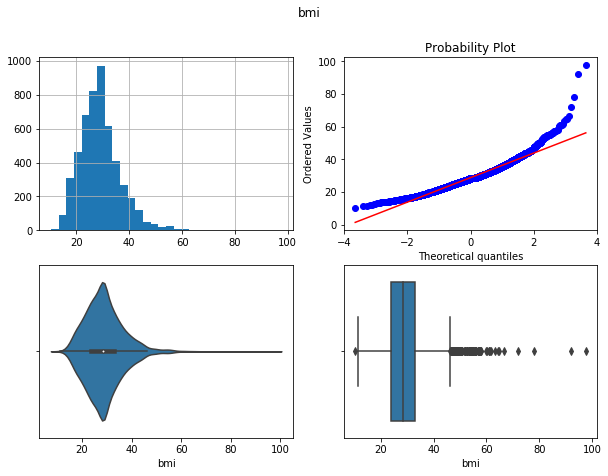

In [ ]:
diagnostic_plots(data, 'bmi', 'bmi')

На графике "Ящик с усами" видно, что много выбросов с левой стороны, утсраним их заменой

In [ ]:
lower_boundary = data['bmi'].mean() - (3 * data['bmi'].std())
upper_boundary = data['bmi'].mean() + (3 * data['bmi'].std())
print('Нижняя граница',lower_boundary)
print('Верхняя граница', upper_boundary)

Нижняя граница 5.793361987638505
Верхняя граница 51.97972296813664


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


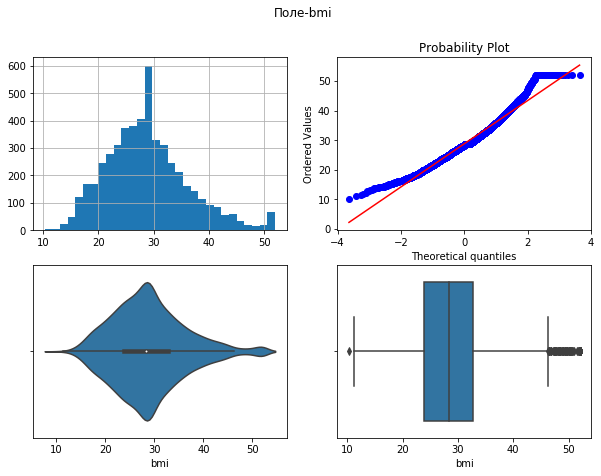

In [ ]:
col = 'bmi'
data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
diagnostic_plots(data, col, title)

Видно, что количество выбросов уменьшилось, но некоторое количество всё же осталось.

## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


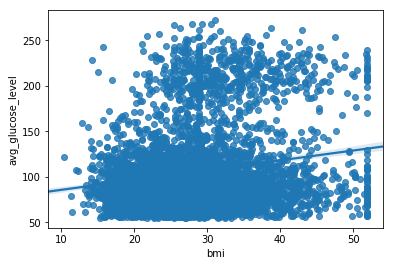

In [ ]:
sns.regplot(x=data['bmi'], y=data['avg_glucose_level'])

Построили график рассеяния, показыающий зависимость между двумя признаками: bmi - индекс массы тела и avg_glucose_level - уровнем глюкозы в крови